In [7]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers as optimizers
import numpy as np
import matplotlib.pyplot as plt

# GPU

GPU Devices: จะบอกว่าคุณมี gpu เช่นของผมจะมี GPU:0 หมายถึงมี gpu อยู่ตำแหน่งที่ 0

In [8]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

Num GPUs Available: 1
GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


โดย tensorflow จะเลือกใช้ gpu เองโดยคุณไม่ต้อง ตั้งแต่อะไรหรือใช้คำสั่งใด เหมือน pytorch

In [ ]:
print("Is GPU available?", tf.test.is_gpu_available()) 
print("GPU name:", tf.config.experimental.get_device_details(tf.config.list_physical_devices('GPU')[0]))

Is GPU available? True
GPU name: {'compute_capability': (8, 9), 'device_name': 'NVIDIA GeForce RTX 4060'}


I0000 00:00:1750431117.821024   20758 gpu_device.cc:2019] Created device /device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:07:00.0, compute capability: 8.9


In [10]:
np.random.seed(1324)
X = np.random.rand(100, 1) * 100
y = 2 * X + 1 + np.random.randn(100, 1) * 10


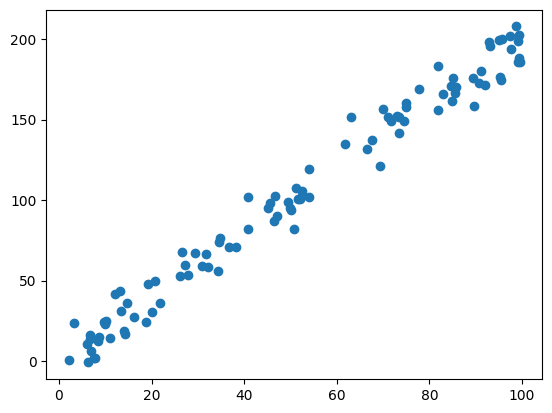

In [11]:
plt.Figure(figsize=(10,10))
plt.scatter(X,y)

keras.Sequential คืออะไร

TensorFlow (tf.keras.Sequential) คือ โมเดลชนิดหนึ่ง ที่เอาเลเยอร์ต่างๆมาต่อเรียงกันแบบลำดับเดียว ต่อเนืองๆ

```python
model = tf.keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
```

ซึ่งเราสามารถเขียนคล้าย nn.Module ของ pytorch

```python
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = keras.layers.Dense(64)
        self.d2 = keras.layers.Dense(1)
    
    def call(self, x):
        x = self.d1(x)
        return self.d2(x)
```

Dense คืออะไร ซึ่งมันอาจจะไม่ใช่ linear regression หรือ regression

แต่สมการของ Dense =  input × weights + bias ซึ่งเหมือนกับ linear regression

| Use Case            | Output Layer Example                     |
| ------------------- | ---------------------------------------- |
| Regression          | Dense(1)             |
| Binary Classify     | Dense(1, activation='sigmoid')         |
| Multiclass Classify | Dense(n_classes, activation='softmax') |


In [50]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,))
])

/home/buglot2/Programs/miniconda3/envs/env.tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6),
              loss='mse')

model.fit คือตัวคำสั่งไว้ train 

ซึ่งเราอาจจะไม่ต้องทำอะไรเลย

- verbose คืออะไร
    - verbose=0 ไม่แสดงข้อความอะไรเลย (เงียบสุด)
    - verbose=1 แสดงแถบความคืบหน้าของการเทรน (progress bar)
    - verbose=2 แสดงแค่ข้อความ epoch โดยไม่มีแถบความคืบหน้า

In [52]:
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 45198.4219
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43981.5898
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38134.5781
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34673.9922
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 35089.3633
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33990.4766
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29723.4355
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29145.5820
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29380.8477
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25682.5254
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24015.4062
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23291.5957
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22580.0215
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20667.7402
Epoch 15/200
4/4 ━━━━━━━━━━━━

In [53]:
y_pred = model.predict(X)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7bf538e2b880> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


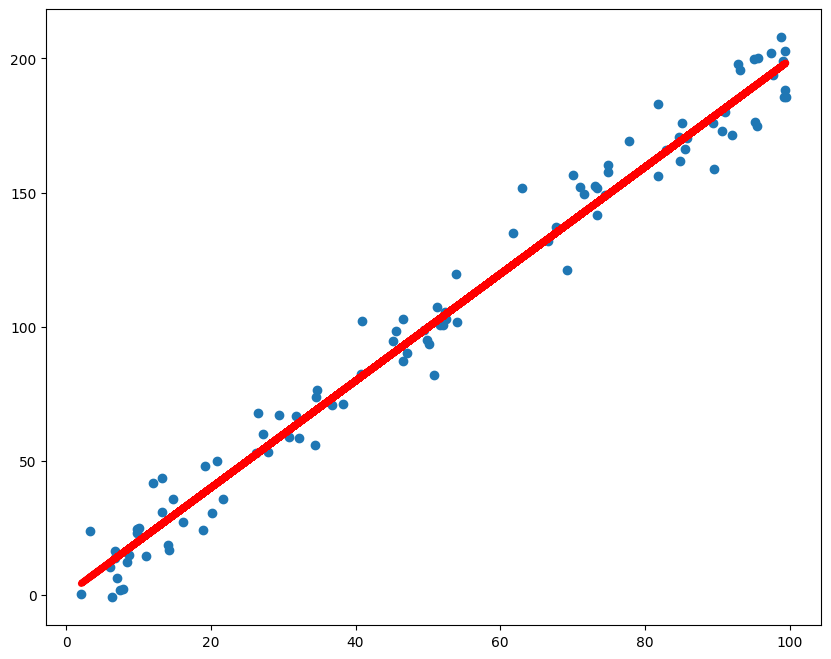

In [54]:
plt.figure(figsize=(10,8))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red',linewidth=5)

In [44]:
weights = model.layers[0].get_weights()
weights

[array([[1.9942625]], dtype=float32), array([0.04643441], dtype=float32)]